In [1]:
] activate

  Activating project at `~/.julia/environments/v1.11`


In [2]:
] st

Status `~/.julia/environments/v1.11/Project.toml`
  [31c24e10] Distributions v0.25.120
⌃ [7073ff75] IJulia v1.29.0
  [b964fa9f] LaTeXStrings v1.4.0
  [5fb14364] OhMyREPL v0.5.31
  [b98c9c47] Pipe v1.3.0
⌃ [91a5bcdd] Plots v1.40.14
  [c3e4b0f8] Pluto v0.20.13
  [7f904dfe] PlutoUI v0.7.68
  [ba661fbb] PreferenceTools v0.1.2
⌃ [295af30f] Revise v3.8.0
  [2913bbd2] StatsBase v0.34.5
  [2177afbf] Trash v1.0.0
  [37e2e46d] LinearAlgebra v1.11.0
  [de0858da] Printf v1.11.0
Info Packages marked with ⌃ have new versions available and may be upgradable.


why the following outputs this:
```
[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] (cache misses: wrong dep version loaded (4), wrong source (2))
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong dep version loaded (2))
```

In [39]:
using Plots, StatsBase, Distributions, LaTeXStrings

In [4]:
# change of variable
g(y) = log(y) - log(1 - y) + 5

g (generic function with 1 method)

In [12]:
g_inv(x) = 1 / (1 + exp(-x + 5)) # this is a logistic sigmoid function

g_inv (generic function with 1 method)

In [13]:
xs = 0.0:0.01:10.0

0.0:0.01:10.0

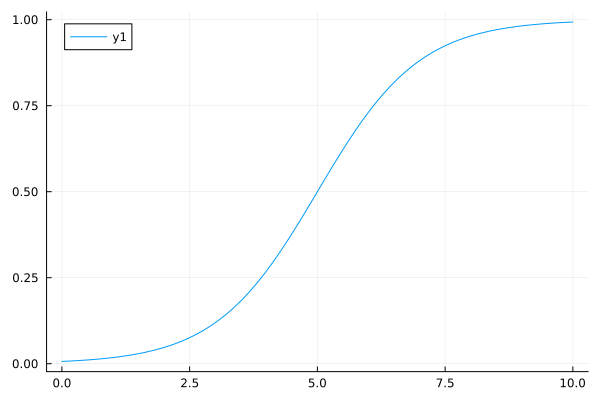

In [14]:
plot(xs, g_inv.(xs))

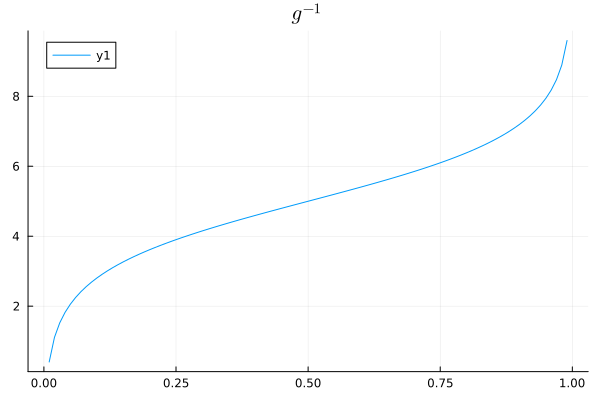

In [41]:
plot(0.0:0.01:1.0, @.( log(xs) - log(max(1 - xs, 0.0)) + 5), title=L"g^{-1}")

In [42]:
normal = Normal(7, 1.0)

Normal{Float64}(μ=7.0, σ=1.0)

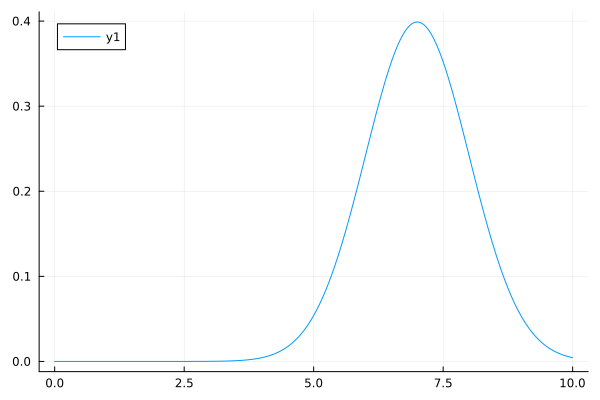

In [43]:
plot(xs, pdf.(normal, xs))

In [44]:
const SAMPLE_SIZE = 50000
smpl = rand(normal, SAMPLE_SIZE)

50000-element Vector{Float64}:
 6.245053294617252
 7.912346182268399
 7.843110978123901
 6.598370670093481
 7.519669819024721
 6.723127410713194
 7.445640030445699
 8.147341690585058
 6.806791074211893
 6.648236902532309
 5.489651549419229
 6.3351919520931474
 7.033840611012808
 ⋮
 6.241689654490138
 8.203051439643323
 6.2974535911868355
 7.29866772587685
 7.233115841157926
 6.0039746471007165
 5.635520764628418
 5.660951544832459
 4.944018865467701
 7.484142167419834
 5.879129852664275
 7.645943218494326

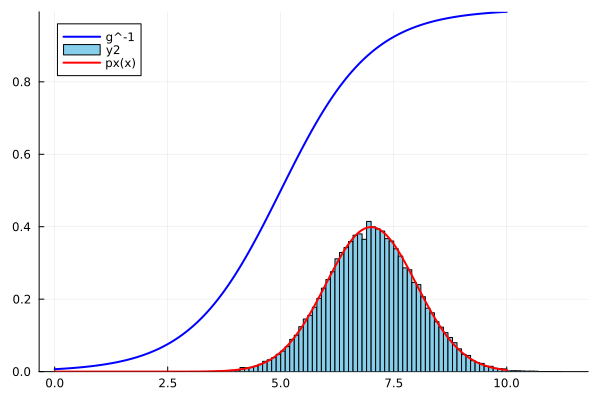

In [48]:
plot(xs, g_inv.(xs), label="g^-1", color=:blue, linewidth=2)

# histogram!(smpl ./ sum(smpl))
histogram!(smpl, normalize=true, color=:skyblue)
p_x(x) = pdf(normal, x)
ys = p_x.(xs)
plot!(xs, ys, label="px(x)", color=:red, linewidth=2)



In this example, the `pdf` of the $p_x(x)$ is Normal Bell curve. As a function, it's

$$  f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}
\exp \left( - \frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

As in our example, the $\sigma^2=1$, hence:

$$ f(x; \mu) = \frac{1}{\sqrt{2 \pi}} 
\exp \left( - \frac{(x - \mu)^2}{2} \right)
$$

Now we change the variables


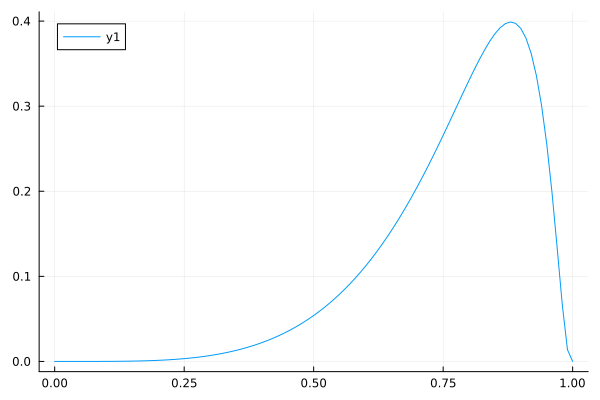

In [103]:
# Transformation
p_x_transformed_as_function = p_x ∘ g

let
    xs = 0.0:0.01:1.0
    plot(xs, p_x_transformed_as_function.(xs))
end

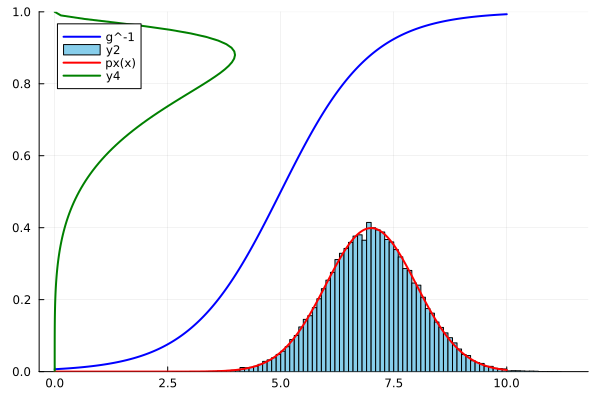

In [59]:
plot(xs, g_inv.(xs), label="g^-1", color=:blue, linewidth=2)

# histogram!(smpl ./ sum(smpl))
histogram!(smpl, normalize=true, color=:skyblue)
p_x(x) = pdf(normal, x)
ys = p_x.(xs)
plot!(xs, ys, label="px(x)", color=:red, linewidth=2)

yr = 0.0:0.01:1.0
xr = p_x_transformed_as_function.(yr)

plot!(xr .* 10, yr, color=:green, linewidth=2)




## Change of variable for `pdf`s

$$ p_y(y) = p_x(x) | \frac{dx}{dy} | = p_x(g(y)) * | \frac{dg}{dy} | $$

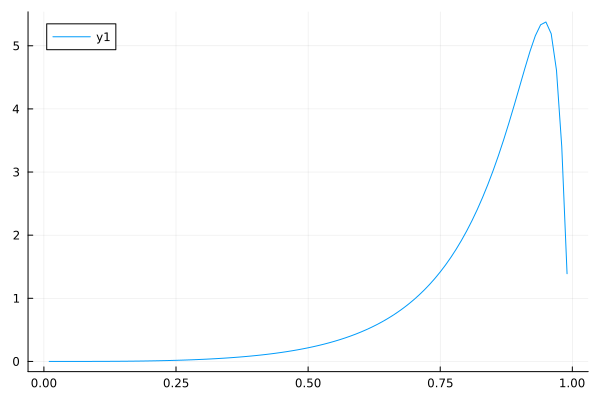

In [62]:
dgdy(y) = 1/y + 1/(1-y)
p_y(y) = (p_x ∘ g)(y) * (abs ∘ dgdy)(y)

let
    ys = 0.0:0.01:1.0
    plot(ys, p_y.(ys))
end

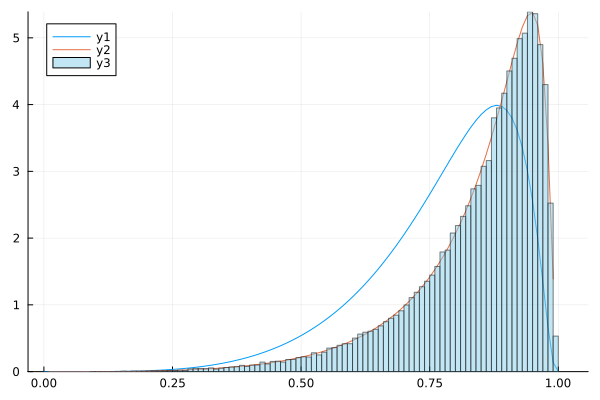

In [117]:
let
    xs = 0.0:0.01:1.0
    plot(xs, 10 .* p_x_transformed_as_function.(xs))
    plot!(xs, p_y.(xs))

    ysmpl = g_inv.(smpl)
    histogram!(ysmpl, normalize=true, color=:skyblue, alpha=0.5)
end

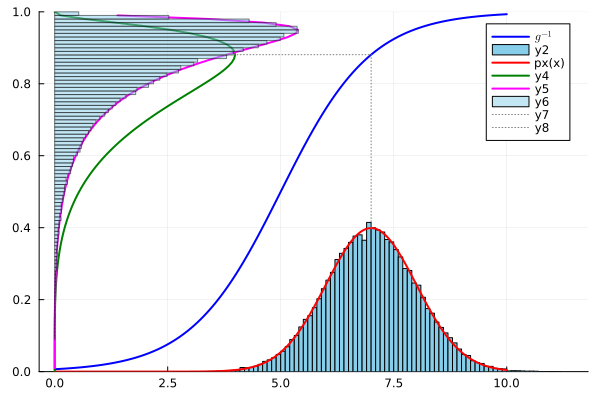

In [131]:
plot(xs, g_inv.(xs), label=L"g^{-1}", color=:blue, linewidth=2)

# histogram!(smpl ./ sum(smpl))
histogram!(smpl, normalize=true, color=:skyblue)
p_x(x) = pdf(normal, x)
ys = p_x.(xs)
plot!(xs, ys, label="px(x)", color=:red, linewidth=2)

yr = 0.0:0.01:1.0
xr = p_x_transformed_as_function.(yr)

const NORMALIZATION = 10
plot!(xr .* NORMALIZATION, yr, color=:green, linewidth=2)

xr_2 = p_y.(yr)
plot!(xr_2, yr, color=:magenta, linewidth=2)

# ysmpl = g_inv.(smpl)
# histogram!(ysmpl, normalize=true, color=:skyblue, alpha=0.5)

ysmpl = g_inv.(smpl)
histogram!(ysmpl, normalize=true, color=:skyblue, alpha=0.5, orientation=:horizontal, ylims=(0.,1.))

xval = 7.0
yval = g_inv(xval)

# plot!([ xval], [yval, yref], linestyle=:dot, color=:gray)
plot!([xval, xval], [p_x(xval), yval], linestyle=:dot, color=:gray)
plot!([0., xval], [yval, yval], linestyle=:dot, color=:gray)
# bar!(ysmpl, normalize=true, color=:skyblue, alpha=0.5)

# savefig("chap2-transform-density.png")

In [124]:
g_inv(7.0)

0.8807970779778823

In [99]:
a = isnan.(xr_2)
a = broadcast(a) do x
    !x
end
maximum(xr_2[a])

5.376859899922255

In [97]:
a = isnan.(xr_2)
broadcast(a) do x
    !x
end

101-element BitVector:
 0
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 0

## Reflection by `y=x` line

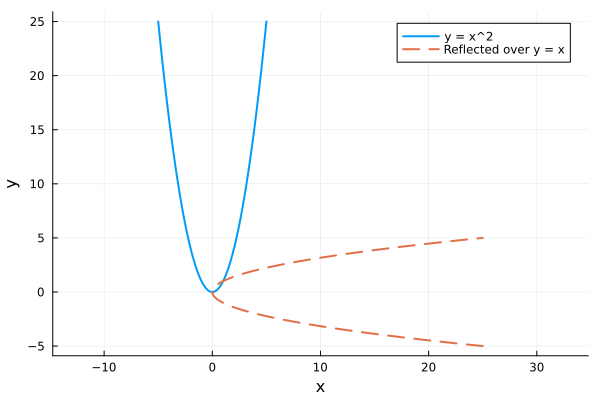

In [45]:
let
    # Original function
    x = -5:0.1:5
    y = x .^ 2
    
    # Reflection over y = x → swap x and y
    xr = y
    yr = x
    
    # Plot both
    plot(x, y, label = "y = x^2", lw=2)
    plot!(xr, yr, label = "Reflected over y = x", lw=2, linestyle=:dash)
    plot!(xlabel = "x", ylabel = "y", legend = :topright, aspect_ratio = :equal)
end

## Multivariate distribution